In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yaml

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

%matplotlib inline

In [3]:
# Load data
filename = "DATA_CHORUS_0.02.yaml"
with open(filename, "r") as file:
    input_data = yaml.safe_load(file)
x = input_data["x"]
Q2 = input_data["Q2"]
F_2 = input_data["F_2"]
F_2_err_stat = input_data["F_2_err_stat"]
F_2_err_sys = input_data["F_2_err_sys"]

In [4]:
# Construct the Dataset
x_data = np.array(Q2)
y_data = np.array(F_2)

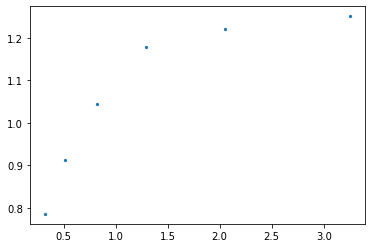

In [5]:
plt.scatter(x_data, y_data, s=5)

In [18]:
def split_trval(x_data, y_data, perc = 0.3):
    size_val = round(len(x_data)*perc)
    idx = np.random.choice(np.arange(1, len(x_data)-1, 2), size_val, replace=False)
    x_val = x_data[idx]
    y_val = y_data[idx]
    x_tr = np.delete(x_data, idx)
    y_tr = np.delete(y_data, idx)

    return x_tr, y_tr, x_val, y_val
    

In [19]:
x_tr, y_tr, x_val, y_val = split_trval(x_data, y_data)

In [20]:
# Create the NN model
model = Sequential()
model.add(Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam", metrics=["accuracy"])

# Display the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,155
Trainable params: 1,155
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_tr, y_tr, validation_data=(x_val ,y_val), epochs=1000, batch_size=10, verbose=1)

Epoch 1/1000
1/1 [==============================] - 1s 810ms/step - loss: 1.1137 - accuracy: 0.0000e+00 - val_loss: 1.0371 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.0619 - accuracy: 0.0000e+00 - val_loss: 1.0035 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 65ms/step - loss: 1.0101 - accuracy: 0.0000e+00 - val_loss: 0.9704 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.9596 - accuracy: 0.0000e+00 - val_loss: 0.9374 - val_accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.9100 - accuracy: 0.0000e+00 - val_loss: 0.9048 - val_accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.8618 - accuracy: 0.0000e+00 - val_loss: 0.8727 - val_accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.8148 - accuracy: 0.0000e+00 - 

In [22]:
x_pred = np.linspace(x_data[0], x_data[-1], num=100)
y_pred = model.predict(x_pred)

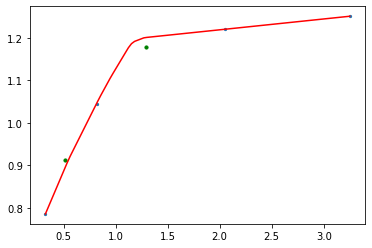

In [24]:
plt.scatter(x_tr, y_tr, s=5)
plt.scatter(x_val, y_val, s=10, color = "green")
plt.plot(x_pred, y_pred, color="red")